In [1]:
import pandas as pd # To handle the data set.
import seaborn as sb # To display visualizations.
import matplotlib.pyplot as plt # To plot
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # To split data
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selection with Cross Validation
from sklearn.decomposition import PCA # To apply PCA
from sklearn import preprocessing, svm # To get MinMax Scaler function
from sklearn.preprocessing import Imputer
# To plot inline
%matplotlib inline
pd.set_option('display.max_columns', None)

## 1 Read the csv file and managment of the dataset

In [2]:
df=pd.read_csv('Respuestas.csv')

df.shape

(150, 29)

In [3]:
df.columns

Index(['Marca temporal', 'Dirección de correo electrónico',
       'Cuando bebo, regularmente yo...', '¿Cuál es tu licor favorito?',
       '¿Cuál es tu Municipio/Delegación? (Si eres foraneo, solo tu estado) ',
       '¿Tienes algún vecino que haga actividades ilegales?',
       '¿Tus padres beben?', '¿Vives con tus padres?', '¿Cuál es tu sexo?',
       '¿Te gustan las matemáticas?', '¿Debes alguna materia?',
       '¿Haz presentado algún extraordinario?',
       '¿Cuales son tus ingresos mensuales (en pesos)?',
       'Tu nivel educativo anterior (preparatoria o bachillerato) era:',
       '¿Eres fóraneo?', '¿Cuánto tiempo realizas para llegar a la escuela?',
       '¿Cuántas veces a la semana consumes alcohol?',
       '¿Perteneces a alguna comunidad indígena?',
       '¿Vives sólo o con roomies o con tu familia?',
       '¿Padeces alguna enfermedad crónica?', 'Vives en el:',
       '¿Tienes alguna beca?',
       '¿Consideras que consumes alcohol en forma desmedida?',
       'Me con

## 1.1 Changing null values and creation of our target

In [4]:
df.drop(['Dirección de correo electrónico','Marca temporal','¿Cuál es tu Municipio/Delegación? (Si eres foraneo, solo tu estado) '],axis=1 ,inplace=True)

df.head(2)

#We drop all the columns with some kind of noise for our model

,"Cuando bebo, regularmente yo...",¿Cuál es tu licor favorito?,¿Tienes algún vecino que haga actividades ilegales?,¿Tus padres beben?,¿Vives con tus padres?,¿Cuál es tu sexo?,¿Te gustan las matemáticas?,¿Debes alguna materia?,¿Haz presentado algún extraordinario?,¿Cuales son tus ingresos mensuales (en pesos)?,Tu nivel educativo anterior (preparatoria o bachillerato) era:,¿Eres fóraneo?,¿Cuánto tiempo realizas para llegar a la escuela?,¿Cuántas veces a la semana consumes alcohol?,¿Perteneces a alguna comunidad indígena?,¿Vives sólo o con roomies o con tu familia?,¿Padeces alguna enfermedad crónica?,Vives en el:,¿Tienes alguna beca?,¿Consideras que consumes alcohol en forma desmedida?,Me considero de clase social...,¿Tienes algún familiar con problema de abuso de sustancias?,¿Cuántas veces en promedio sales de fiesta en una semana?,¿Estudias en la carrera que fue tu primera opción?,¿Haz considerado cambiar de carrera?,¿Crees que la escuela crea un ambiente de estrés constante?
0,NaN,NaN,NaN,No,No,Hombre,Sí,No,Sí,"Más de 3,000 y menos de7,000",Escuela pública,Sí,15 minutos o menos,Menos de 1,No,Sí,No,Estado de México,No,No,NaN,NaN,Menos de 1,No,No,No
1,"Me pongo ""happy""",Vodka,No,No,Sí,Mujer,Sí,No,No,"Más de 3,000 y menos de7,000",Escuela pública,No,De 16 a 30 minutos,No consumo,No,No,Sí,Estado de México,Sí,No,NaN,NaN,Menos de 1,Sí,Sí,Sí


In [5]:
y_week =(df['¿Cuántas veces a la semana consumes alcohol?'] != 'No consumo').astype(int)

y_party=(df['¿Cuántas veces en promedio sales de fiesta en una semana?']!='Menos de 1').astype(int)

Y=y_week*y_party
df['target']=Y

df.head(10)


,"Cuando bebo, regularmente yo...",¿Cuál es tu licor favorito?,¿Tienes algún vecino que haga actividades ilegales?,¿Tus padres beben?,¿Vives con tus padres?,¿Cuál es tu sexo?,¿Te gustan las matemáticas?,¿Debes alguna materia?,¿Haz presentado algún extraordinario?,¿Cuales son tus ingresos mensuales (en pesos)?,Tu nivel educativo anterior (preparatoria o bachillerato) era:,¿Eres fóraneo?,¿Cuánto tiempo realizas para llegar a la escuela?,¿Cuántas veces a la semana consumes alcohol?,¿Perteneces a alguna comunidad indígena?,¿Vives sólo o con roomies o con tu familia?,¿Padeces alguna enfermedad crónica?,Vives en el:,¿Tienes alguna beca?,¿Consideras que consumes alcohol en forma desmedida?,Me considero de clase social...,¿Tienes algún familiar con problema de abuso de sustancias?,¿Cuántas veces en promedio sales de fiesta en una semana?,¿Estudias en la carrera que fue tu primera opción?,¿Haz considerado cambiar de carrera?,¿Crees que la escuela crea un ambiente de estrés constante?,target
0,NaN,NaN,NaN,No,No,Hombre,Sí,No,Sí,"Más de 3,000 y menos de7,000",Escuela pública,Sí,15 minutos o menos,Menos de 1,No,Sí,No,Estado de México,No,No,NaN,NaN,Menos de 1,No,No,No,0
1,"Me pongo ""happy""",Vodka,No,No,Sí,Mujer,Sí,No,No,"Más de 3,000 y menos de7,000",Escuela pública,No,De 16 a 30 minutos,No consumo,No,No,Sí,Estado de México,Sí,No,NaN,NaN,Menos de 1,Sí,Sí,Sí,0
2,Me emborracho,Mezcal,No,No,No,Hombre,Sí,Sí,Sí,"Más de 7,000",Escuela privada,No,15 minutos o menos,Menos de 1,No,No,No,Estado de México,No,No,NaN,NaN,Menos de 1,Sí,No,No,0
3,"Me pongo ""happy""",Ron,Si,No,Sí,Hombre,Sí,Sí,Sí,"Más de 7,000",Escuela pública,No,Más de 90 minutos,Menos de 1,No,familia,No,Estado de México,No,No,media,No,Menos de 1,Sí,Sí,Sí,0
4,Me tomo un par de cervezas/cocteles,Tequila,Si,No,No,Hombre,Sí,No,Sí,"Menos de 1,000",Escuela privada,No,De 60 minutos a 90 minutos,No consumo,No,familia,No,Estado de México,No,No,media,No,Menos de 1,Sí,No,Sí,0
5,Me tomo un par de cervezas/cocteles,Whiskey,No,No,Sí,Hombre,No,Sí,No,"Más de 3,000 y menos de7,000",Escuela pública,No,De 60 minutos a 90 minutos,Sólo 1,No,familia,Sí,Ciudad de México,No,No,media,Sí,Menos de 1,No,Sí,Sí,0
6,Me tomo un par de cervezas/cocteles,Whiskey,No,No,Sí,Hombre,No,Sí,No,"Más de 3,000 y menos de7,000",Escuela pública,No,De 60 minutos a 90 minutos,Sólo 1,No,familia,Sí,Ciudad de México,No,No,media,Sí,Menos de 1,No,Sí,Sí,0
7,Me emborracho,Tequila,No,No,Sí,Hombre,Sí,Sí,Sí,"Más de 7,000",Escuela pública,No,De 31 a 60 minutos,2 o más veces,No,familia,No,Estado de México,No,Tal vez,media,No,Al menos 2,Sí,No,No,1
8,Me tomo un par de cervezas/cocteles,Cerveza,Si,No,Sí,Hombre,Sí,Sí,No,"Más de 7,000",Escuela pública,No,De 31 a 60 minutos,Menos de 1,No,familia,No,Estado de México,No,No,media,No,Menos de 1,Sí,No,Sí,0
9,Me emborracho,Vodka,Si,No,Sí,Hombre,Sí,No,Sí,"Más de 1,000 y menos de 3,000",Escuela pública,No,De 60 minutos a 90 minutos,Sólo 1,No,familia,Sí,Estado de México,No,Sí,alta,No,Más de 2,Sí,No,Sí,1


In [6]:
#Dropping the features that gives a lot of information about alcohol.
df.drop(['Cuando bebo, regularmente yo...', 
       '¿Cuántas veces a la semana consumes alcohol?',
       '¿Consideras que consumes alcohol en forma desmedida?',
       '¿Tienes algún familiar con problema de abuso de sustancias?',
       '¿Cuántas veces en promedio sales de fiesta en una semana?'], axis=1, inplace=True)
var = list(df.columns)
d = dict(zip(var,['x%d'%i for i in range(1,len(var)+1)]))
X = df[var].copy()

X.rename(columns=d,inplace=True)

X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,NaN,NaN,No,No,Hombre,Sí,No,Sí,"Más de 3,000 y menos de7,000",Escuela pública,Sí,15 minutos o menos,No,Sí,No,Estado de México,No,NaN,No,No,No,0
1,Vodka,No,No,Sí,Mujer,Sí,No,No,"Más de 3,000 y menos de7,000",Escuela pública,No,De 16 a 30 minutos,No,No,Sí,Estado de México,Sí,NaN,Sí,Sí,Sí,0
2,Mezcal,No,No,No,Hombre,Sí,Sí,Sí,"Más de 7,000",Escuela privada,No,15 minutos o menos,No,No,No,Estado de México,No,NaN,Sí,No,No,0
3,Ron,Si,No,Sí,Hombre,Sí,Sí,Sí,"Más de 7,000",Escuela pública,No,Más de 90 minutos,No,familia,No,Estado de México,No,media,Sí,Sí,Sí,0
4,Tequila,Si,No,No,Hombre,Sí,No,Sí,"Menos de 1,000",Escuela privada,No,De 60 minutos a 90 minutos,No,familia,No,Estado de México,No,media,Sí,No,Sí,0
5,Whiskey,No,No,Sí,Hombre,No,Sí,No,"Más de 3,000 y menos de7,000",Escuela pública,No,De 60 minutos a 90 minutos,No,familia,Sí,Ciudad de México,No,media,No,Sí,Sí,0
6,Whiskey,No,No,Sí,Hombre,No,Sí,No,"Más de 3,000 y menos de7,000",Escuela pública,No,De 60 minutos a 90 minutos,No,familia,Sí,Ciudad de México,No,media,No,Sí,Sí,0
7,Tequila,No,No,Sí,Hombre,Sí,Sí,Sí,"Más de 7,000",Escuela pública,No,De 31 a 60 minutos,No,familia,No,Estado de México,No,media,Sí,No,No,1
8,Cerveza,Si,No,Sí,Hombre,Sí,Sí,No,"Más de 7,000",Escuela pública,No,De 31 a 60 minutos,No,familia,No,Estado de México,No,media,Sí,No,Sí,0
9,Vodka,Si,No,Sí,Hombre,Sí,No,Sí,"Más de 1,000 y menos de 3,000",Escuela pública,No,De 60 minutos a 90 minutos,No,familia,Sí,Estado de México,No,alta,Sí,No,Sí,1


In [7]:
df.columns

Index(['¿Cuál es tu licor favorito?',
       '¿Tienes algún vecino que haga actividades ilegales?',
       '¿Tus padres beben?', '¿Vives con tus padres?', '¿Cuál es tu sexo?',
       '¿Te gustan las matemáticas?', '¿Debes alguna materia?',
       '¿Haz presentado algún extraordinario?',
       '¿Cuales son tus ingresos mensuales (en pesos)?',
       'Tu nivel educativo anterior (preparatoria o bachillerato) era:',
       '¿Eres fóraneo?', '¿Cuánto tiempo realizas para llegar a la escuela?',
       '¿Perteneces a alguna comunidad indígena?',
       '¿Vives sólo o con roomies o con tu familia?',
       '¿Padeces alguna enfermedad crónica?', 'Vives en el:',
       '¿Tienes alguna beca?', 'Me considero de clase social...',
       '¿Estudias en la carrera que fue tu primera opción?',
       '¿Haz considerado cambiar de carrera?',
       '¿Crees que la escuela crea un ambiente de estrés constante?',
       'target'],
      dtype='object')

### Filling NaN

In [8]:

X=X.fillna("")

## Categorical features
Unfortunately, sklearn’s machine learning library does not support handling categorical data. Even for tree-based models, it is necessary to convert categorical features to a numerical representation.

In [9]:
encoder =OrdinalEncoder() #Initializing the encoder for the categorical data

In [10]:
X_category=X.select_dtypes(include=['object']).copy()
X_category.columns
for i in X_category.columns:
    X[i]=encoder.fit_transform(X[i].values.reshape(-1,1))

## 1.2 Scaling Data
Working with values in a wide range is not convenient, we need to scale it, in this case, we are going to normailze it and scaling in in a 0-1 range

In [11]:
# Initializing the MinMaxScaler function
min_max_scaler = preprocessing.MinMaxScaler()


In [12]:
# Scaling dataset keeping the columns name
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)
X_scaled.head()
X_scaled.drop(['x22'], axis=1, inplace=True)

In [42]:
X_scaled.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.650952,0.696667,0.446667,0.780000,0.366667,0.753333,0.506667,0.686667,0.573333,0.80000,0.560000,0.608333,0.066667,0.550000,0.093333,0.766667,0.286667,0.913333,0.766667,0.386667,0.786667
std,0.287689,0.251817,0.498813,0.415634,0.483509,0.432515,0.501630,0.465403,0.339144,0.40134,0.173011,0.300191,0.250279,0.153264,0.291874,0.424370,0.453719,0.209506,0.424370,0.488618,0.411034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,1.00000,0.500000,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.785714,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.666667,1.00000,0.500000,0.500000,0.000000,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.928571,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.500000,0.750000,0.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39a441b438>,
      dtype=object)

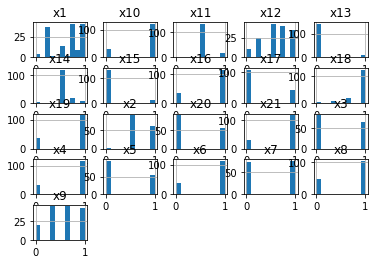

In [44]:
X_scaled.hist()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

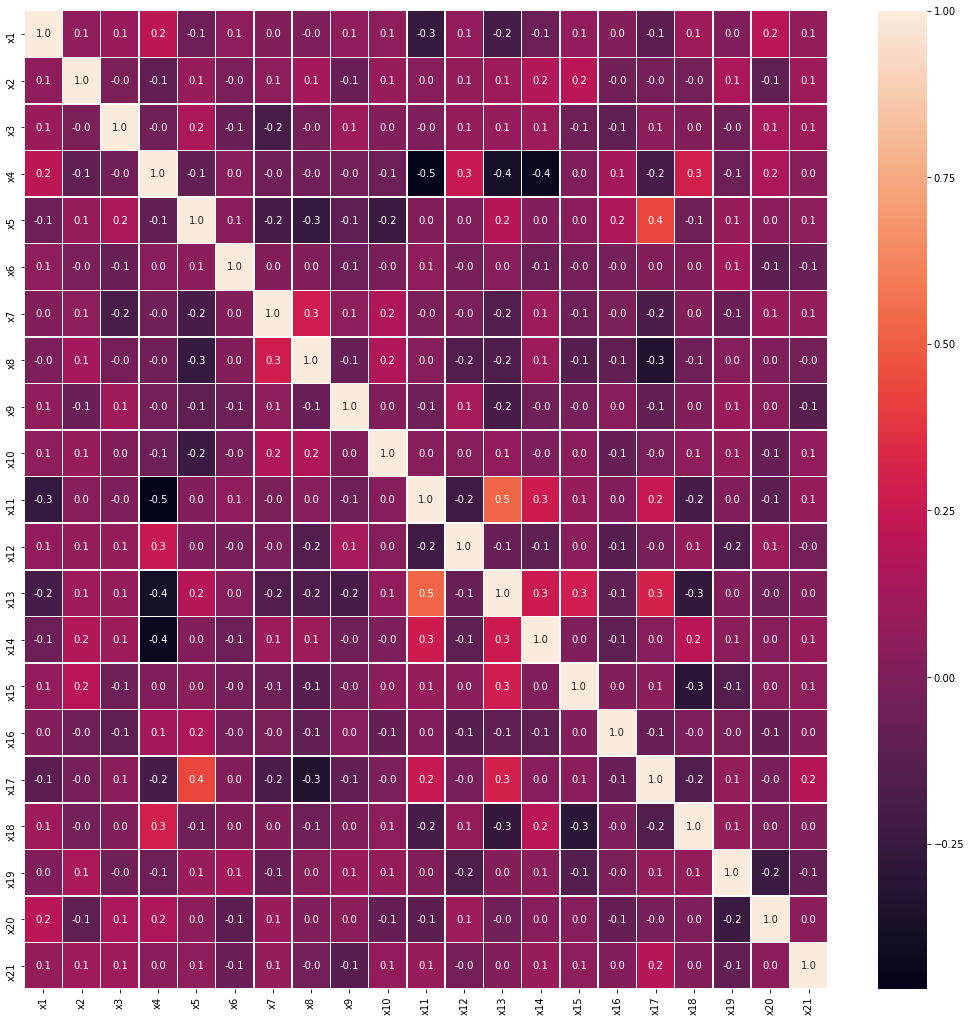

In [45]:
f, ax = plt.subplots(figsize=(18, 18))
sb.heatmap(X_scaled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(rotation=90)

## 1.3 Splitting up Data

In [13]:
# Splitting  up data, seting 75% for train and 25% for test.
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.18, random_state=21)

## 2 Select the K best features
This medhod works by selection of the K best features acording to a score. The K number of features is setting explicity.

In [14]:
# Initialize SelectKBest function
UnivariateFeatureSelection = SelectKBest(chi2, k=5).fit(x_train, y_train)
d


{'Me considero de clase social...': 'x18',
 'Tu nivel educativo anterior (preparatoria o bachillerato) era:': 'x10',
 'Vives en el:': 'x16',
 'target': 'x22',
 '¿Crees que la escuela crea un ambiente de estrés constante?': 'x21',
 '¿Cuales son tus ingresos mensuales (en pesos)?': 'x9',
 '¿Cuál es tu licor favorito?': 'x1',
 '¿Cuál es tu sexo?': 'x5',
 '¿Cuánto tiempo realizas para llegar a la escuela?': 'x12',
 '¿Debes alguna materia?': 'x7',
 '¿Eres fóraneo?': 'x11',
 '¿Estudias en la carrera que fue tu primera opción?': 'x19',
 '¿Haz considerado cambiar de carrera?': 'x20',
 '¿Haz presentado algún extraordinario?': 'x8',
 '¿Padeces alguna enfermedad crónica?': 'x15',
 '¿Perteneces a alguna comunidad indígena?': 'x13',
 '¿Te gustan las matemáticas?': 'x6',
 '¿Tienes alguna beca?': 'x17',
 '¿Tienes algún vecino que haga actividades ilegales?': 'x2',
 '¿Tus padres beben?': 'x3',
 '¿Vives con tus padres?': 'x4',
 '¿Vives sólo o con roomies o con tu familia?': 'x14'}

In [15]:
# Creating a dict to visualize which features were selected with the highest score
diccionario = {key:value for (key, value) in zip(UnivariateFeatureSelection.scores_, x_train.columns)}
sorted(diccionario.items())

[(0.0003437164339420025, 'x11'),
 (0.032303585049580544, 'x9'),
 (0.06855670103092781, 'x19'),
 (0.11567237766547518, 'x7'),
 (0.11831706926891725, 'x4'),
 (0.1356459330143537, 'x21'),
 (0.1521052631578947, 'x17'),
 (0.15619848797079117, 'x1'),
 (0.1933270676691729, 'x14'),
 (0.2103853383458651, 'x12'),
 (0.23750000000000004, 'x18'),
 (0.34804431290993487, 'x16'),
 (0.5254955570745041, 'x5'),
 (0.8916452896948266, 'x8'),
 (0.9243935309973053, 'x3'),
 (0.9612005557371679, 'x6'),
 (0.9880169172932332, 'x13'),
 (1.2208266330566304, 'x2'),
 (3.0496240601503763, 'x20'),
 (4.0449971081550045, 'x15')]

### What features have the highest score?

We can see, the last five features have the highest score. So the best are:
1. x15: ¿Padeces alguna enfermedad crónica?
2. x20: ¿Haz considerado cambiar de carrera?
3. x2: ¿Tienes algún vecino que haga actividades ilegales?
4. x13: ¿Perteneces a alguna comunidad indígena?
5. x6: ¿Te gustan las matemáticas?

In [16]:
l=list(d.items())
l.sort(key=lambda x: x[1])
l


[('¿Cuál es tu licor favorito?', 'x1'),
 ('Tu nivel educativo anterior (preparatoria o bachillerato) era:', 'x10'),
 ('¿Eres fóraneo?', 'x11'),
 ('¿Cuánto tiempo realizas para llegar a la escuela?', 'x12'),
 ('¿Perteneces a alguna comunidad indígena?', 'x13'),
 ('¿Vives sólo o con roomies o con tu familia?', 'x14'),
 ('¿Padeces alguna enfermedad crónica?', 'x15'),
 ('Vives en el:', 'x16'),
 ('¿Tienes alguna beca?', 'x17'),
 ('Me considero de clase social...', 'x18'),
 ('¿Estudias en la carrera que fue tu primera opción?', 'x19'),
 ('¿Tienes algún vecino que haga actividades ilegales?', 'x2'),
 ('¿Haz considerado cambiar de carrera?', 'x20'),
 ('¿Crees que la escuela crea un ambiente de estrés constante?', 'x21'),
 ('target', 'x22'),
 ('¿Tus padres beben?', 'x3'),
 ('¿Vives con tus padres?', 'x4'),
 ('¿Cuál es tu sexo?', 'x5'),
 ('¿Te gustan las matemáticas?', 'x6'),
 ('¿Debes alguna materia?', 'x7'),
 ('¿Haz presentado algún extraordinario?', 'x8'),
 ('¿Cuales son tus ingresos mensuale

In [17]:
# Using the 'UnivariateFeatureSelection' based on 'SelectKBest' function,
# let's extract the best features from the original dataset

x_train_k_best = UnivariateFeatureSelection.transform(x_train)
x_test_k_best = UnivariateFeatureSelection.transform(x_test)

In [18]:
print("Shape of original data: ", x_train.shape)
print("Shape of corpus with best features: ", x_train_k_best.shape)


Shape of original data:  (123, 21)
Shape of corpus with best features:  (123, 5)


## 3 Testing with Random Forest Algorithm

In [19]:
# Initializing and fitting data to the random forest classifier
RandForest_K_best = RandomForestClassifier()      
RandForest_K_best = RandForest_K_best.fit(x_train_k_best, y_train)

/home/armando/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
# Making a prediction and calculting the accuracy
y_pred = RandForest_K_best.predict(x_test_k_best)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.8518518518518519


# Random Forest 
## Accuracy: 0.851852

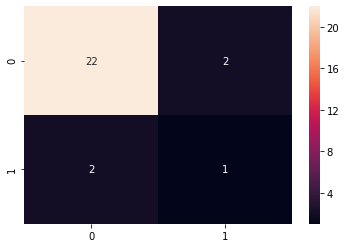

In [21]:
# Showing performance with a confusion matrix
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

## Testing with Logistic Regression


In [22]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
...                          multi_class='multinomial').fit(x_train_k_best, y_train)

In [23]:
clf.predict(x_test_k_best[:2, :])

array([0, 0])

In [24]:
clf.predict_proba(x_test_k_best[:2, :])

array([[0.57818143, 0.42181857],
       [0.82872769, 0.17127231]])

In [25]:
ac= clf.score(x_test_k_best,y_test)

print("Accuracy: ", ac)

Accuracy:  0.9259259259259259


# Logistic Regression
## Accuracy: 0.9259

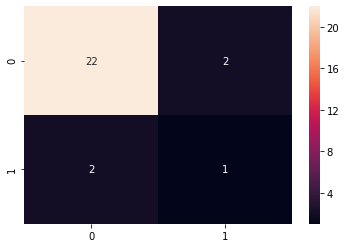

In [26]:
# Showing performance with a confusion matrix
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

/home/armando/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


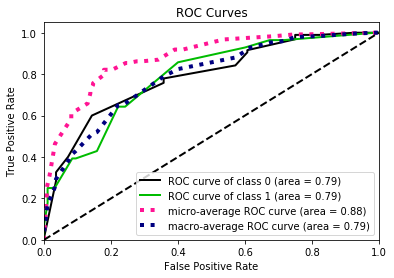

In [27]:
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

y_trues = y_train
y_proba = clf.predict_proba(x_train_k_best)

skplt.metrics.plot_roc_curve(y_trues,y_proba)
plt.show()


## Testing with Grid Search

In [28]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x_train_k_best,y_train)

/home/armando/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [30]:
ac= clf.score(x_test_k_best,y_test)

print("Accuracy: ", ac)

Accuracy:  0.8518518518518519


## Grid Search

### Accuracy: 0.8518518518518519

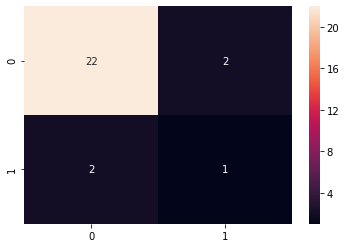

In [31]:
# Showing performance with a confusion matrix
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

## Testing with AdaBoost 

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [33]:
 x_train_k_best, y_train = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)


In [34]:
clf.fit(x_train_k_best, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [35]:
clf.feature_importances_ 


array([0.28, 0.42, 0.14, 0.16])

In [36]:
clf.predict([[0, 0, 0, 0]])


array([1])

In [37]:

print ("Accuracy: ", clf.score(x_train_k_best, y_train))

Accuracy:  0.983


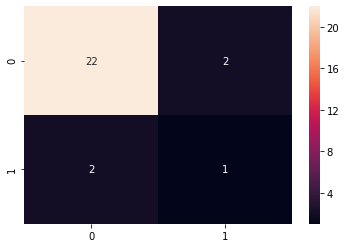

In [38]:
# Showing performance with a confusion matrix
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")